In [37]:
import os
import pandas as pd

path = 'D:\\elice_python\\GAS_5\\pytest_machine\\'

In [38]:
os.chdir(path)

In [39]:
data = pd.read_csv(os.path.join(path,'cancer.csv'))
print(data.head())
print(data.shape)
print(data.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         18.0          10.4           123.0     1000.0           0.1180   
1         20.6          17.8           133.0     1330.0           0.0847   
2         19.7          21.3           130.0     1200.0           0.1100   
3         11.4          20.4            77.6      386.0           0.1420   
4         20.3          14.3           135.0     1300.0           0.1000   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.2780          0.3000               0.1470          0.242   
1            0.0786          0.0869               0.0702          0.181   
2            0.1600          0.1970               0.1280          0.207   
3            0.2840          0.2410               0.1050          0.260   
4            0.1330          0.1980               0.1040          0.181   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [40]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X.head(), X.shape,y.head(), y.shape, sep='\n')

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         18.0          10.4           123.0     1000.0           0.1180   
1         20.6          17.8           133.0     1330.0           0.0847   
2         19.7          21.3           130.0     1200.0           0.1100   
3         11.4          20.4            77.6      386.0           0.1420   
4         20.3          14.3           135.0     1300.0           0.1000   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.2780          0.3000               0.1470          0.242   
1            0.0786          0.0869               0.0702          0.181   
2            0.1600          0.1970               0.1280          0.207   
3            0.2840          0.2410               0.1050          0.260   
4            0.1330          0.1980               0.1040          0.181   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


In [46]:
from collections import Counter
train_count = Counter(y_train)
test_count = Counter(y_test)
print(train_count[0]/train_count[1])
print(test_count[0]/test_count[1])

0.5955056179775281
0.5888888888888889


In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', max_iter=10000).fit(X_train,y_train)

In [48]:
import pickle
with open('logistic10000_regress_cancer.pickle','wb') as handle:
    pickle.dump(logreg,handle,protocol = pickle.HIGHEST_PROTOCOL)

In [49]:
with open('logistic10000_regress_cancer.pickle','rb') as handle:
    loaded_logreg = pickle.load(handle)

In [50]:
loaded_logreg.score(X_test,y_test)

0.951048951048951

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000).fit(X_train,y_train)
logreg.score(X_test,y_test)

0.951048951048951

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
logreg_liblinear = LogisticRegression(solver='liblinear', max_iter=10000).fit(X_train,y_train)
print(logreg_liblinear.score(X_test,y_test))
logreg_lbfgs = LogisticRegression(solver='lbfgs', max_iter=10000).fit(X_train,y_train)
print(logreg_lbfgs.score(X_test,y_test))
logreg_sag = LogisticRegression(solver='sag', max_iter=10000).fit(X_train,y_train)
print(logreg_sag.score(X_test,y_test))
logreg_saga = LogisticRegression(solver='saga', max_iter=10000).fit(X_train,y_train)
print(logreg_saga.score(X_test,y_test))

0.972027972027972
0.986013986013986
0.951048951048951
0.9440559440559441


In [53]:
logreg_liblinear = LogisticRegression(C=100, solver='liblinear', max_iter=10000, penalty='l1').fit(X_train,y_train)

print(logreg_liblinear.score(X_train,y_train))
print(logreg_liblinear.score(X_test,y_test))


0.9882629107981221
0.9790209790209791


## 연습문제

In [54]:
wine = pd.read_csv(os.path.join(path, 'wine.csv'))

In [55]:
wine.head()

,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [56]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6496 entries, 0 to 6495
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.4     6496 non-null   float64
 1   0.7     6496 non-null   float64
 2   0       6496 non-null   float64
 3   1.9     6496 non-null   float64
 4   0.076   6496 non-null   float64
 5   11      6496 non-null   float64
 6   34      6496 non-null   float64
 7   0.9978  6496 non-null   float64
 8   3.51    6496 non-null   float64
 9   0.56    6496 non-null   float64
 10  9.4     6496 non-null   float64
 11  5       6496 non-null   int64  
 12  1       6496 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
wine_logleg = LogisticRegression(C=23, 
                                max_iter=10000, 
                                penalty='l1',
                                solver='liblinear')\
    .fit(X_train,y_train)
print(wine_logleg.score(X_train,y_train))
print(wine_logleg.score(X_test,y_test))
    


0.9859154929577465
0.951048951048951


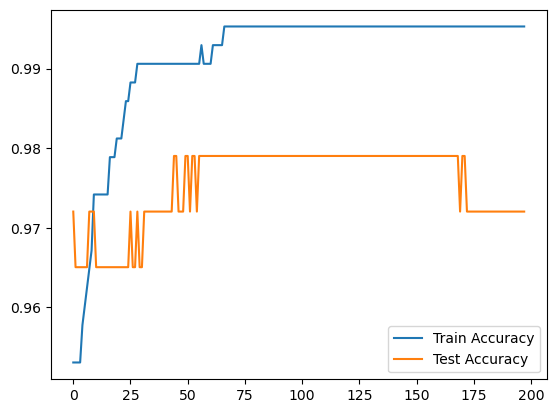

In [77]:
import matplotlib.pyplot as plt
import numpy as np

train_accuracy = []
test_accuracy = []
costs = np.arange(1,100, step=1)
solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag' 'saga']
penalty = ['l1', 'l2']

for C in costs : 
    wine_logleg = LogisticRegression(C=C, 
                                    max_iter=10000, 
                                    penalty='l1',
                                    solver='liblinear')\
        .fit(X_train,y_train)
    train_accuracy.append(wine_logleg.score(X_train,y_train))
    test_accuracy.append(wine_logleg.score(X_test,y_test))
    
plt.plot(train_accuracy, label = 'Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.legend()
plt.show()

In [78]:
np.argmax(test_accuracy), max(test_accuracy)

(44, 0.9790209790209791)

In [82]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import plotly.graph_objects as go
import itertools

train_accuracies = {}
test_accuracies = {}
costs = np.arange(1, 100, step=1)
solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
penalties = ['l1', 'l2']

# 모든 조합 생성
combinations = list(itertools.product(solvers, penalties))

for solver, penalty in combinations:
    train_accuracy = []
    test_accuracy = []
    for C in costs:
        # 일부 조합은 호환되지 않으므로 try-except 블록을 사용
        try:
            wine_logleg = LogisticRegression(C=C, max_iter=10000, penalty=penalty, solver=solver)
            wine_logleg.fit(X_train, y_train)
            train_accuracy.append(wine_logleg.score(X_train, y_train))
            test_accuracy.append(wine_logleg.score(X_test, y_test))
        except Exception as e:
            # 호환되지 않는 조합의 경우 정확도를 0으로 설정
            train_accuracy.append(0)
            test_accuracy.append(0)

    combo_label = f'solver={solver}, penalty={penalty}'
    train_accuracies[combo_label] = train_accuracy
    test_accuracies[combo_label] = test_accuracy

# 그래프 그리기
fig = go.Figure()

for label, train_acc in train_accuracies.items():
    fig.add_trace(go.Scatter(x=costs, y=train_acc, mode='lines', name=f'Train {label}'))

for label, test_acc in test_accuracies.items():
    fig.add_trace(go.Scatter(x=costs, y=test_acc, mode='lines', name=f'Test {label}', line=dict(dash='dash')))

fig.update_layout(
    title='Train and Test Accuracy for Different Solvers and Penalties',
    xaxis_title='Cost (C)',
    yaxis_title='Accuracy',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()


c:\Users\Caelu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Caelu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [85]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import plotly.graph_objects as go
import itertools

train_accuracies = {}
test_accuracies = {}
costs = np.arange(1, 100, step=1)
solvers = ['newton-cg']
penalties = ['l2']

# 모든 조합 생성
combinations = list(itertools.product(solvers, penalties))

for solver, penalty in combinations:
    train_accuracy = []
    test_accuracy = []
    for C in costs:
        # 일부 조합은 호환되지 않으므로 try-except 블록을 사용
        try:
            wine_logleg = LogisticRegression(C=C, max_iter=1000000, penalty=penalty, solver=solver)
            wine_logleg.fit(X_train, y_train)
            train_accuracy.append(wine_logleg.score(X_train, y_train))
            test_accuracy.append(wine_logleg.score(X_test, y_test))
        except Exception as e:
            # 호환되지 않는 조합의 경우 정확도를 0으로 설정
            train_accuracy.append(0)
            test_accuracy.append(0)

    combo_label = f'solver={solver}, penalty={penalty}'
    train_accuracies[combo_label] = train_accuracy
    test_accuracies[combo_label] = test_accuracy

# 그래프 그리기
fig = go.Figure()

for label, train_acc in train_accuracies.items():
    fig.add_trace(go.Scatter(x=costs, y=train_acc, mode='lines', name=f'Train {label}'))

for label, test_acc in test_accuracies.items():
    fig.add_trace(go.Scatter(x=costs, y=test_acc, mode='lines', name=f'Test {label}', line=dict(dash='dash')))

fig.update_layout(
    title='Train and Test Accuracy for Different Solvers and Penalties',
    xaxis_title='Cost (C)',
    yaxis_title='Accuracy',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()


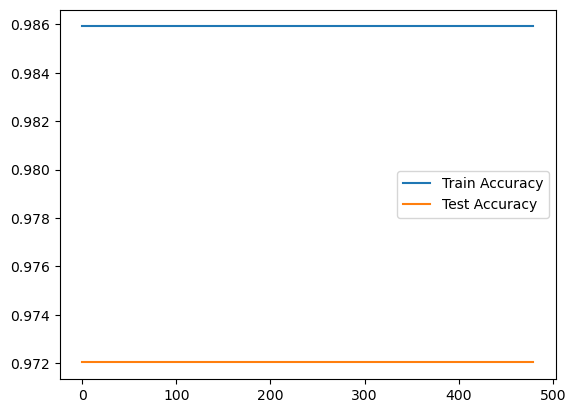

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

seed_train_acc = []
seed_test_acc = []

seeds = np.arange(2000,50000,step=100)

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
    wine_logleg = LogisticRegression(C=23, 
                                    max_iter=10000, 
                                    penalty='l1',
                                    solver='liblinear')\
        .fit(X_train,y_train)
    seed_train_acc.append(wine_logleg.score(X_train,y_train))
    seed_test_acc.append(wine_logleg.score(X_test,y_test))
    
plt.plot(seed_train_acc, label = 'Train Accuracy')
plt.plot(seed_test_acc, label='Test Accuracy')
plt.legend()
plt.show()